In [1]:
import os
import sys
HOME_DIR = '/Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering'
os.chdir(HOME_DIR)

DATASETS_DIR = f'{HOME_DIR}/datasets'
DATA_DIR = f'{DATASETS_DIR}/08'
BONING_DATASET_FILE = f'{DATA_DIR}/ampc2/Boning.csv'
SLICING_DATASET_FILE = f'{DATA_DIR}/ampc2/Slicing.csv'

print(f'HOME_DIR: {HOME_DIR}')
print(f'DATASETS_DIR: {DATASETS_DIR}')
print(f'DATA_DIR: {DATA_DIR}')
print(f'BONING_DATASET_FILE: {BONING_DATASET_FILE}')
print(f'SLICING_DATASET_FILE: {SLICING_DATASET_FILE}')

HOME_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering
DATASETS_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets
DATA_DIR: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets/08
BONING_DATASET_FILE: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets/08/ampc2/Boning.csv
SLICING_DATASET_FILE: /Users/anhdang/Documents/Github/COS40007-Artificial-Intelligence-for-Engineering/datasets/08/ampc2/Slicing.csv


In [2]:
!pip install --upgrade pip --quiet
!pip install -r requirements.txt --quiet

In [3]:
import json
import pandas as pd
import numpy as np

from scipy.integrate import simpson as simps
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# NOTE:
# Column Set 1: L5 (x, y, z)
# Column Set 2: T12 (x, y, z)

# Dataset Inspection

BoningCSV

In [5]:
# Load Boning dataset
boning_df = pd.read_csv(BONING_DATASET_FILE)

In [6]:
# Boning dataset shape
boning_df.shape

(54180, 67)

In [7]:
# Boning dataset columns
boning_df.columns

Index(['Frame', 'L5 x', 'L5 y', 'L5 z', 'L3 x', 'L3 y', 'L3 z', 'T12 x',
       'T12 y', 'T12 z', 'T8 x', 'T8 y', 'T8 z', 'Neck x', 'Neck y', 'Neck z',
       'Head x', 'Head y', 'Head z', 'Right Shoulder x', 'Right Shoulder y',
       'Right Shoulder z', 'Right Upper Arm x', 'Right Upper Arm y',
       'Right Upper Arm z', 'Right Forearm x', 'Right Forearm y',
       'Right Forearm z', 'Right Hand x', 'Right Hand y', 'Right Hand z',
       'Left Shoulder x', 'Left Shoulder y', 'Left Shoulder z',
       'Left Upper Arm x', 'Left Upper Arm y', 'Left Upper Arm z',
       'Left Forearm x', 'Left Forearm y', 'Left Forearm z', 'Left Hand x',
       'Left Hand y', 'Left Hand z', 'Right Upper Leg x', 'Right Upper Leg y',
       'Right Upper Leg z', 'Right Lower Leg x', 'Right Lower Leg y',
       'Right Lower Leg z', 'Right Foot x', 'Right Foot y', 'Right Foot z',
       'Right Toe x', 'Right Toe y', 'Right Toe z', 'Left Upper Leg x',
       'Left Upper Leg y', 'Left Upper Leg z', 'Left Lower

In [8]:
# First 5 rows
boning_df.head(5)

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,0.052654,0.039386,-0.077002,0.076056,0.056891,-0.111225,0.099458,0.074396,-0.145448,...,0.011806,0.121231,-0.079631,0.020690,0.124997,-0.169401,0.003467,0.124997,-0.169401,0.003467
1,1,-0.053525,0.117279,0.150245,-0.078560,0.171968,0.217296,-0.103594,0.226658,0.284348,...,0.231347,0.094984,0.134901,0.073241,0.099210,0.315884,0.099760,0.091222,0.314948,0.099742
2,2,0.073929,-0.022381,0.032701,0.105559,-0.029586,0.047209,0.137189,-0.036791,0.061717,...,0.062618,0.028965,0.138562,0.047474,0.037484,-0.038600,0.031238,0.029455,-0.039869,0.031214
3,3,-0.037295,-0.009975,0.015846,-0.032722,0.003632,0.038552,-0.028150,0.017239,0.061258,...,0.006895,-0.063305,0.215892,0.038873,0.077475,0.000989,0.111197,0.047133,-0.008699,0.026959
4,4,0.091745,-0.014404,0.054168,0.132364,-0.018714,0.078221,0.172983,-0.023023,0.102274,...,0.017431,0.077462,0.142185,0.044010,0.145175,-0.009129,0.074555,0.138419,-0.012442,0.074571


In [9]:
# Last 5 rows
boning_df.tail(5)

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
54175,54175,-0.517198,-0.015782,-0.122907,-0.756456,-0.016568,-0.176368,-0.995715,-0.017354,-0.229829,...,-0.072791,0.391113,-0.742073,-0.083342,-0.795359,-0.336933,-0.507823,-0.797533,-0.307028,-0.507163
54176,54176,0.129974,-0.162556,-0.308774,0.087942,-0.128618,-0.364683,0.045909,-0.094680,-0.420593,...,-0.070595,0.860149,-0.467361,-0.161265,0.097514,-0.059214,-0.460668,0.165085,-0.033804,-0.487299
54177,54177,0.379037,-0.104331,0.090104,0.539296,-0.145616,0.129932,0.699554,-0.186900,0.169760,...,-0.206584,0.146210,-0.339723,-0.125023,-0.004569,-0.071033,-0.322283,-0.026291,-0.037563,-0.322689
54178,54178,0.022015,-0.110805,0.088934,0.024395,-0.160585,0.128186,0.026775,-0.210365,0.167437,...,0.270664,-0.519476,0.390552,0.202116,-0.751282,-0.187910,0.311200,-0.776450,-0.155341,0.310363
54179,54179,0.132618,-0.101097,0.067043,0.208750,-0.127851,0.105071,0.284883,-0.154605,0.143100,...,0.144120,-0.720352,1.383447,0.109772,-0.619973,0.008978,0.417641,-0.685214,-0.033804,0.198063


In [10]:
boning_df.describe()

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
count,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,...,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000,54180.000000
mean,27089.500000,-0.004635,-0.000110,0.003835,-0.005254,0.000970,0.005874,-0.005874,0.002050,0.007912,...,-0.019230,0.003445,-0.008191,-0.007893,-0.004595,0.004648,-0.005782,-0.001711,0.004516,0.002089
std,15640.563129,0.670811,0.566650,0.434615,0.960774,0.795684,0.615253,1.253266,1.028811,0.798510,...,0.725964,1.323737,1.497188,0.690409,1.721424,1.193410,1.084819,1.684979,1.189246,1.074874
min,0.000000,-9.529681,-11.050340,-5.469383,-13.745627,-15.926846,-7.818795,-17.961573,-20.803352,-10.225488,...,-12.208943,-22.596462,-29.606227,-21.340287,-49.250083,-28.082640,-24.859754,-36.543737,-26.660149,-24.721795
25%,13544.750000,-0.227320,-0.177936,-0.144189,-0.322647,-0.248738,-0.204484,-0.418456,-0.319794,-0.265078,...,-0.206531,-0.380573,-0.494484,-0.186468,-0.348061,-0.316125,-0.217815,-0.346676,-0.316855,-0.205948
50%,27089.500000,-0.003885,0.006770,0.001380,-0.004432,0.010191,0.002568,-0.003918,0.014029,0.004139,...,-0.006699,-0.005292,0.002966,-0.003856,-0.014317,0.005533,0.008176,-0.015485,0.004969,0.014001
75%,40634.250000,0.223235,0.200544,0.151893,0.317472,0.282270,0.214741,0.413233,0.364757,0.279794,...,0.181934,0.355966,0.487547,0.168172,0.287229,0.332724,0.243013,0.286848,0.332680,0.245344
max,54179.000000,14.950358,9.819392,8.911717,21.592190,14.172133,10.501353,28.234023,18.524873,13.728549,...,10.755519,20.546986,19.930001,13.468850,42.949162,30.498145,26.118296,41.990168,29.772758,25.546454


In [11]:
boning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54180 entries, 0 to 54179
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              54180 non-null  int64  
 1   L5 x               54180 non-null  float64
 2   L5 y               54180 non-null  float64
 3   L5 z               54180 non-null  float64
 4   L3 x               54180 non-null  float64
 5   L3 y               54180 non-null  float64
 6   L3 z               54180 non-null  float64
 7   T12 x              54180 non-null  float64
 8   T12 y              54180 non-null  float64
 9   T12 z              54180 non-null  float64
 10  T8 x               54180 non-null  float64
 11  T8 y               54180 non-null  float64
 12  T8 z               54180 non-null  float64
 13  Neck x             54180 non-null  float64
 14  Neck y             54180 non-null  float64
 15  Neck z             54180 non-null  float64
 16  Head x             541

In [12]:
boning_df.isna().sum()

Frame          0
L5 x           0
L5 y           0
L5 z           0
L3 x           0
              ..
Left Foot y    0
Left Foot z    0
Left Toe x     0
Left Toe y     0
Left Toe z     0
Length: 67, dtype: int64

SlicingCSV

In [13]:
# Load Slicing dataset
slicing_df = pd.read_csv(SLICING_DATASET_FILE)

In [14]:
# Slicing dataset shape
slicing_df.shape

(17880, 67)

In [15]:
# Slicing dataset columns
slicing_df.columns

Index(['Frame', 'L5 x', 'L5 y', 'L5 z', 'L3 x', 'L3 y', 'L3 z', 'T12 x',
       'T12 y', 'T12 z', 'T8 x', 'T8 y', 'T8 z', 'Neck x', 'Neck y', 'Neck z',
       'Head x', 'Head y', 'Head z', 'Right Shoulder x', 'Right Shoulder y',
       'Right Shoulder z', 'Right Upper Arm x', 'Right Upper Arm y',
       'Right Upper Arm z', 'Right Forearm x', 'Right Forearm y',
       'Right Forearm z', 'Right Hand x', 'Right Hand y', 'Right Hand z',
       'Left Shoulder x', 'Left Shoulder y', 'Left Shoulder z',
       'Left Upper Arm x', 'Left Upper Arm y', 'Left Upper Arm z',
       'Left Forearm x', 'Left Forearm y', 'Left Forearm z', 'Left Hand x',
       'Left Hand y', 'Left Hand z', 'Right Upper Leg x', 'Right Upper Leg y',
       'Right Upper Leg z', 'Right Lower Leg x', 'Right Lower Leg y',
       'Right Lower Leg z', 'Right Foot x', 'Right Foot y', 'Right Foot z',
       'Right Toe x', 'Right Toe y', 'Right Toe z', 'Left Upper Leg x',
       'Left Upper Leg y', 'Left Upper Leg z', 'Left Lower

In [16]:
# First 5 rows
slicing_df.head(5)

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
0,0,-0.012539,-0.023092,-0.037696,-0.018112,-0.033355,-0.054450,-0.023685,-0.043617,-0.071204,...,-0.004247,0.015117,-0.109421,-0.007150,0.047547,-0.069688,-0.023800,0.047547,-0.069688,-0.023800
1,1,-0.014146,0.057422,0.017591,-0.019864,0.082837,0.025461,-0.025582,0.108252,0.033332,...,-0.009161,0.047860,0.037084,-0.016778,0.059598,0.036626,-0.005471,0.057358,0.035208,-0.005450
2,2,-0.073246,-0.014965,-0.014101,-0.105308,-0.021510,-0.020315,-0.137370,-0.028054,-0.026528,...,0.005529,-0.096096,0.022938,0.062969,-0.032496,-0.040150,0.042961,-0.034332,-0.041492,0.042953
3,3,-0.054076,0.019098,0.006340,-0.091487,0.011623,0.013548,-0.128898,0.004149,0.020757,...,-0.014663,-0.075465,-0.056221,0.088429,-0.013296,-0.016638,0.105897,-0.021412,-0.028961,0.077145
4,4,-0.088772,-0.193634,-0.011749,-0.127064,-0.279901,-0.017003,-0.165355,-0.366168,-0.022256,...,-0.017543,0.009852,-0.207643,0.031294,0.070038,-0.096551,0.004033,0.068555,-0.098178,0.004050


In [17]:
# Last 5 rows
slicing_df.tail(5)

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
17875,17875,-0.299632,-0.055806,0.064378,-0.434314,-0.087950,0.093503,-0.568995,-0.120094,0.122627,...,-0.250397,-2.051169,-3.845730,-0.278676,4.596440,-2.999468,0.662151,4.778641,-2.542876,0.671927
17876,17876,-0.256818,-0.067065,0.088435,-0.360567,-0.130262,0.112538,-0.464315,-0.193459,0.136641,...,-0.122861,-2.354977,-3.357652,-0.292587,4.164559,-3.926063,0.864322,4.191308,-3.940403,0.804323
17877,17877,-0.135368,-0.239857,0.035852,-0.195806,-0.355807,0.053062,-0.256244,-0.471757,0.070272,...,0.015247,-2.852749,-3.375176,-0.385981,3.282034,-4.473908,0.917019,3.494279,-4.091495,0.972747
17878,17878,-0.083036,-0.293007,-0.017898,-0.120276,-0.432056,-0.024654,-0.157517,-0.571106,-0.031410,...,-0.125277,-2.966915,-3.296036,-0.582545,2.481092,-4.773027,0.753708,2.699702,-4.434226,0.824499
17879,17879,-0.126037,-0.156934,-0.015643,-0.171985,-0.280832,-0.046323,-0.217932,-0.404730,-0.077003,...,0.189956,-2.526932,-2.886883,-0.800261,1.490555,-5.016424,0.861750,1.583905,-5.074351,0.762694


In [18]:
# Slicing dataset description
slicing_df.describe()

,Frame,L5 x,L5 y,L5 z,L3 x,L3 y,L3 z,T12 x,T12 y,T12 z,...,Left Upper Leg z,Left Lower Leg x,Left Lower Leg y,Left Lower Leg z,Left Foot x,Left Foot y,Left Foot z,Left Toe x,Left Toe y,Left Toe z
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,...,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8939.500000,-0.006705,-0.001351,0.001939,-0.009135,-0.000063,0.003088,-0.011566,0.001225,0.004238,...,-0.007176,0.005632,-0.003387,-0.057102,-0.000595,0.002532,-0.008118,0.000146,0.000813,-0.000244
std,5161.655742,0.355046,0.511220,0.367829,0.505387,0.731958,0.530224,0.657288,0.954120,0.692918,...,0.446662,1.320231,0.878274,0.826135,1.345048,1.032964,0.896490,1.339497,1.047566,0.893955
min,0.000000,-4.334696,-4.201705,-4.161487,-6.251185,-6.073993,-6.011000,-8.167674,-7.946280,-7.860512,...,-9.745262,-24.162910,-13.699668,-9.843720,-18.051601,-25.960464,-22.347965,-18.222505,-25.809129,-21.961980
25%,4469.750000,-0.193574,-0.221773,-0.163092,-0.276062,-0.314960,-0.234861,-0.359114,-0.407428,-0.306643,...,-0.140864,-0.407356,-0.326056,-0.125448,-0.296061,-0.293306,-0.156649,-0.299148,-0.294161,-0.148987
50%,8939.500000,-0.010425,0.007169,-0.001701,-0.014919,0.010316,-0.002465,-0.019526,0.014712,-0.002741,...,-0.003334,-0.009949,0.009744,-0.004554,-0.010291,-0.013837,0.007091,-0.010313,-0.016037,0.015622
75%,13409.250000,0.176314,0.233068,0.164536,0.252685,0.333246,0.237616,0.329502,0.434702,0.309903,...,0.132515,0.379674,0.318482,0.115925,0.260862,0.268519,0.173175,0.261276,0.268239,0.178849
max,17879.000000,3.511343,6.062532,3.497136,5.088239,8.721543,5.051719,6.665136,11.380555,6.606302,...,7.389414,16.464169,18.014811,11.609954,21.436803,41.805967,15.837935,21.078066,42.093178,15.997508


In [19]:
# Slicing dataset information
slicing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17880 non-null  int64  
 1   L5 x               17880 non-null  float64
 2   L5 y               17880 non-null  float64
 3   L5 z               17880 non-null  float64
 4   L3 x               17880 non-null  float64
 5   L3 y               17880 non-null  float64
 6   L3 z               17880 non-null  float64
 7   T12 x              17880 non-null  float64
 8   T12 y              17880 non-null  float64
 9   T12 z              17880 non-null  float64
 10  T8 x               17880 non-null  float64
 11  T8 y               17880 non-null  float64
 12  T8 z               17880 non-null  float64
 13  Neck x             17880 non-null  float64
 14  Neck y             17880 non-null  float64
 15  Neck z             17880 non-null  float64
 16  Head x             178

In [20]:
# Slicing dataset missing values
slicing_df.isna().sum()

Frame          0
L5 x           0
L5 y           0
L5 z           0
L3 x           0
              ..
Left Foot y    0
Left Foot z    0
Left Toe x     0
Left Toe y     0
Left Toe z     0
Length: 67, dtype: int64

# Dataset Collection

In [21]:
# Defined columns to extract
columns_to_extract = ['Frame', 'L5 x', 'L5 y', 'L5 z', 'T12 x', 'T12 y', 'T12 z']

In [22]:
# Extract columns
boning_data = boning_df[columns_to_extract].copy()
slicing_data = slicing_df[columns_to_extract].copy()

# Print DataFrame Inspection
print(f'----------------------------------------')
print(f'Boning Data Shape: {boning_data.shape}')
print(f'Slicing Data Shape: {slicing_data.shape}')
print(f'----------------------------------------')
print(f'Boning Data Columns: {boning_data.columns}')
print(f'Slicing Data Columns: {slicing_data.columns}')
print(f'----------------------------------------')
print(f'Boning Data Info: {boning_data.info()}')
print(f'Slicing Data Info: {slicing_data.info()}')
print(f'----------------------------------------')
print(f'Boning Data Missing Values: {boning_data.isna().sum()}')
print(f'Slicing Data Missing Values: {slicing_data.isna().sum()}')
print(f'----------------------------------------')
print(f'Boning Data First 5 Rows: {boning_data.head()}')
print(f'Slicing Data First 5 Rows: {slicing_data.head()}')
print(f'----------------------------------------')

----------------------------------------
Boning Data Shape: (54180, 7)
Slicing Data Shape: (17880, 7)
----------------------------------------
Boning Data Columns: Index(['Frame', 'L5 x', 'L5 y', 'L5 z', 'T12 x', 'T12 y', 'T12 z'], dtype='object')
Slicing Data Columns: Index(['Frame', 'L5 x', 'L5 y', 'L5 z', 'T12 x', 'T12 y', 'T12 z'], dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54180 entries, 0 to 54179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Frame   54180 non-null  int64  
 1   L5 x    54180 non-null  float64
 2   L5 y    54180 non-null  float64
 3   L5 z    54180 non-null  float64
 4   T12 x   54180 non-null  float64
 5   T12 y   54180 non-null  float64
 6   T12 z   54180 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB
Boning Data Info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (t

In [23]:
# Add class labels
boning_data['class'] = 0  # Boning
slicing_data['class'] = 1  # Slicing

In [24]:
# Merge Boning and Slicing datasets
combined_data = pd.concat([boning_data, slicing_data])
combined_data.to_csv(f'{DATA_DIR}/combined_data.csv', index=False)

# Print DataFrame Inspection
print(f'----------------------------------------')
print(f'Combined DF Shape: {combined_data.shape}')
print(f'----------------------------------------')
print(f'Combined DF Columns: {combined_data.columns}')
print(f'----------------------------------------')
print(f'Combined DF Info: {combined_data.info()}')
print(f'----------------------------------------')
print(f'Combined DF Missing Values: {combined_data.isna().sum()}')
print(f'----------------------------------------')
print(f'Combined DF First 5 Rows: {combined_data.head()}')
print(f'----------------------------------------')

----------------------------------------
Combined DF Shape: (72060, 8)
----------------------------------------
Combined DF Columns: Index(['Frame', 'L5 x', 'L5 y', 'L5 z', 'T12 x', 'T12 y', 'T12 z', 'class'], dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 72060 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Frame   72060 non-null  int64  
 1   L5 x    72060 non-null  float64
 2   L5 y    72060 non-null  float64
 3   L5 z    72060 non-null  float64
 4   T12 x   72060 non-null  float64
 5   T12 y   72060 non-null  float64
 6   T12 z   72060 non-null  float64
 7   class   72060 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 4.9 MB
Combined DF Info: None
----------------------------------------
Combined DF Missing Values: Frame    0
L5 x     0
L5 y     0
L5 z     0
T12 x    0
T12 y    0
T12 z    0
class    0
dtype: int64
-----------------

# Dataset Composite Columns

In [25]:
# TODO
# 1) Root mean square value of x and y 
# 2) Root mean square value of y and z 
# 3) Root mean square value of z and x 
# 4) Root mean square value of x, y and z 
# 5) Roll (180 * atan2(accelY, sqrt(accelX*accelX + accelZ*accelZ))/PI) 
# 6) Pitch (180 * atan2(accelX, sqrt(accelY*accelY + accelZ*accelZ))/PI) 

In [33]:
# Load the original combined data
combined_data = pd.read_csv(f'{DATA_DIR}/combined_data.csv')

# Compute composite columns
combined_data['RMS_xy'] = np.sqrt(combined_data['L5 x']**2 + combined_data['L5 y']**2)
combined_data['RMS_yz'] = np.sqrt(combined_data['L5 y']**2 + combined_data['L5 z']**2)
combined_data['RMS_zx'] = np.sqrt(combined_data['L5 z']**2 + combined_data['L5 x']**2)
combined_data['RMS_xyz'] = np.sqrt(combined_data['L5 x']**2 + combined_data['L5 y']**2 + combined_data['L5 z']**2)

combined_data['Roll'] = 180 * np.arctan2(combined_data['L5 y'], np.sqrt(combined_data['L5 x']**2 + combined_data['L5 z']**2)) / np.pi
combined_data['Pitch'] = 180 * np.arctan2(combined_data['L5 x'], np.sqrt(combined_data['L5 y']**2 + combined_data['L5 z']**2)) / np.pi

combined_data.head()

,Frame,L5 x,L5 y,L5 z,T12 x,T12 y,T12 z,class,RMS_xy,RMS_yz,RMS_zx,RMS_xyz,Roll,Pitch
0,0,0.052654,0.039386,-0.077002,0.099458,0.074396,-0.145448,0,0.065755,0.086490,0.093283,0.101257,22.890444,31.332626
1,1,-0.053525,0.117279,0.150245,-0.103594,0.226658,0.284348,0,0.128916,0.190599,0.159495,0.197972,36.327537,-15.686203
2,2,0.073929,-0.022381,0.032701,0.137189,-0.036791,0.061717,0,0.077243,0.039627,0.080839,0.083880,-15.474967,61.808452
3,3,-0.037295,-0.009975,0.015846,-0.028150,0.017239,0.061258,0,0.038606,0.018725,0.040521,0.041731,-13.829694,-63.340086
4,4,0.091745,-0.014404,0.054168,0.172983,-0.023023,0.102274,0,0.092869,0.056051,0.106543,0.107512,-7.699627,58.577410


Class distribution before grouping:
class
0    54180
1    17880
Name: count, dtype: int64


/var/folders/j4/_l7jsdmj24j2vdmvyd1f9qk80000gn/T/ipykernel_83121/2578175257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


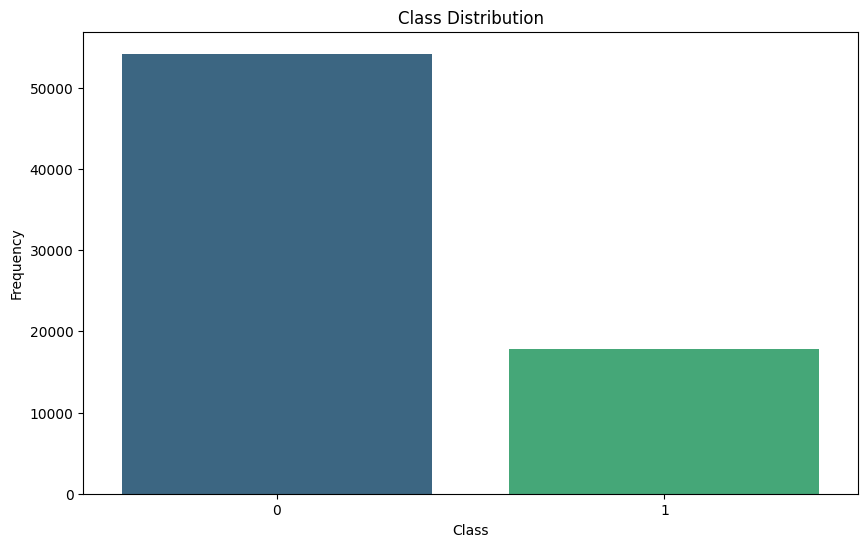

,Frame,L5 x,L5 y,L5 z,T12 x,T12 y,T12 z,class,RMS_xy,RMS_yz,RMS_zx,RMS_xyz,Roll,Pitch
count,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000,72060.000000
mean,22586.002914,-0.005149,-0.000418,0.003365,-0.007286,0.001845,0.007000,0.248127,0.553438,0.473358,0.492378,0.645979,1.098557,-0.884870
std,15874.387643,0.607955,0.553411,0.419036,1.134964,1.010787,0.773652,0.431929,0.607949,0.507736,0.550272,0.658944,40.719744,43.049484
min,0.000000,-9.529681,-11.050340,-5.469383,-17.961573,-20.803352,-10.225488,0.000000,0.001025,0.000726,0.000684,0.005408,-89.618663,-89.649849
25%,9007.000000,-0.217291,-0.188501,-0.149155,-0.398634,-0.341621,-0.275600,0.000000,0.188933,0.157427,0.169073,0.243899,-30.632372,-36.188767
50%,18149.500000,-0.005312,0.006834,0.000695,-0.008232,0.014108,0.002845,0.000000,0.371840,0.317192,0.328637,0.452644,1.398260,-1.112382
75%,36164.250000,0.209263,0.209207,0.155183,0.387225,0.383178,0.287440,0.000000,0.698762,0.610816,0.610770,0.818997,33.118810,34.263733
max,54179.000000,14.950358,9.819392,8.911717,28.234023,18.524873,13.728549,1.000000,15.049108,11.086600,16.626080,16.714934,89.438380,89.901601


In [28]:
# Check the distribution of the classes
print("Class distribution before grouping:")
class_distribution = combined_data['class'].value_counts()
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of the dataset
combined_data.describe()


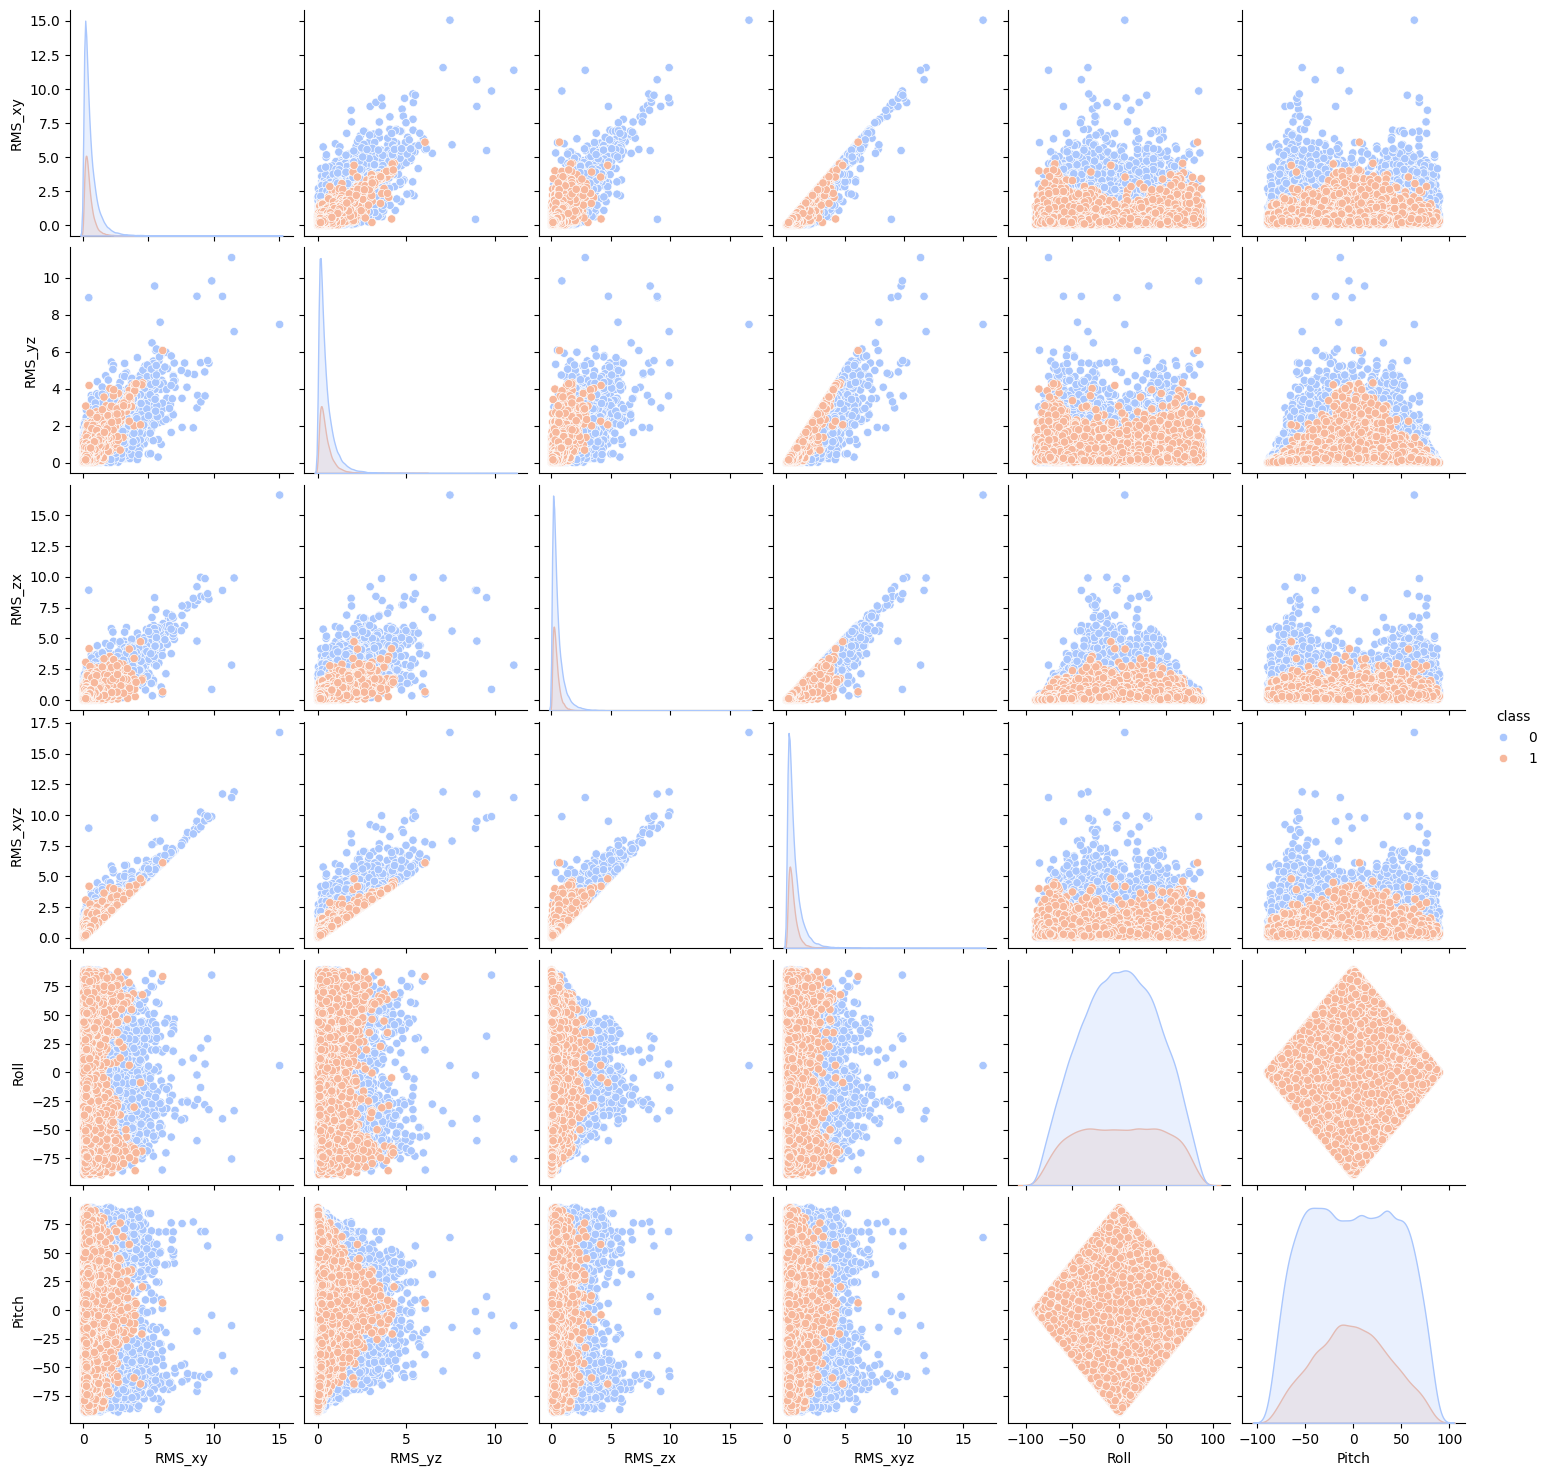

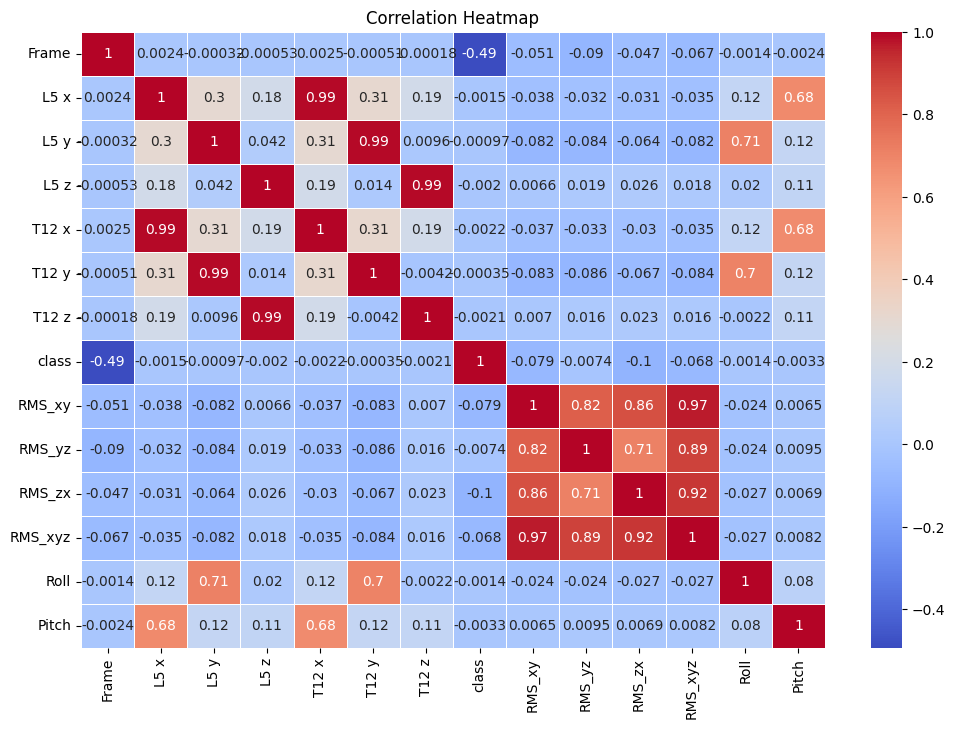

In [34]:
# Pairplot of the computed columns and the original 'class' column
sns.pairplot(combined_data, vars=['RMS_xy', 'RMS_yz', 'RMS_zx', 'RMS_xyz', 'Roll', 'Pitch'], hue='class', palette="coolwarm")
plt.show()

# Correlation heatmap of the numerical columns
plt.figure(figsize=(12, 8))
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Pre Processing


In [29]:
# Function to compute features for each column
def compute_features(df):
    features = {}
    for col in df.columns[1:-1]:  # Skip 'frame' and 'class'
        features[col + '_mean'] = df[col].mean()
        features[col + '_std'] = df[col].std()
        features[col + '_min'] = df[col].min()
        features[col + '_max'] = df[col].max()
        features[col + '_auc'] = simps(df[col])
        features[col + '_peaks'] = len(find_peaks(df[col])[0])
    return pd.Series(features)

# Group by each minute (assuming 60 frames per minute)
grouped_data = combined_data.groupby(['class', combined_data['Frame'] // 60]).apply(compute_features)

# Reset index
grouped_data = grouped_data.reset_index()

# Reassign class labels correctly
grouped_data['class'] = grouped_data['class'].astype(int)

# Save the reprocessed data
grouped_data.to_csv(f'{DATA_DIR}/reprocessed_grouped_data.csv', index=False)

# Print DataFrame Inspection
print(f'Processed Data Shape: {grouped_data.shape}')
print(f'Processed Data Columns: {grouped_data.columns}')
print(f'Processed Data Info: {grouped_data.info()}')
print(f'Processed Data First 5 Rows: {grouped_data.head()}')


Processed grouped data class distribution:
class
0    903
1    298
Name: count, dtype: int64
----------------------------------------
Processed Data Shape: (1201, 74)
----------------------------------------
Processed Data Columns: Index(['class', 'Frame', 'L5 x_mean', 'L5 x_std', 'L5 x_min', 'L5 x_max',
       'L5 x_auc', 'L5 x_peaks', 'L5 y_mean', 'L5 y_std', 'L5 y_min',
       'L5 y_max', 'L5 y_auc', 'L5 y_peaks', 'L5 z_mean', 'L5 z_std',
       'L5 z_min', 'L5 z_max', 'L5 z_auc', 'L5 z_peaks', 'T12 x_mean',
       'T12 x_std', 'T12 x_min', 'T12 x_max', 'T12 x_auc', 'T12 x_peaks',
       'T12 y_mean', 'T12 y_std', 'T12 y_min', 'T12 y_max', 'T12 y_auc',
       'T12 y_peaks', 'T12 z_mean', 'T12 z_std', 'T12 z_min', 'T12 z_max',
       'T12 z_auc', 'T12 z_peaks', 'class_mean', 'class_std', 'class_min',
       'class_max', 'class_auc', 'class_peaks', 'RMS_xy_mean', 'RMS_xy_std',
       'RMS_xy_min', 'RMS_xy_max', 'RMS_xy_auc', 'RMS_xy_peaks', 'RMS_yz_mean',
       'RMS_yz_std', 'RMS_yz_

/var/folders/j4/_l7jsdmj24j2vdmvyd1f9qk80000gn/T/ipykernel_83121/2873569986.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_data = combined_data.groupby(['class', combined_data['Frame'] // 60]).apply(compute_features)


In [ ]:
# Check the new class distribution after grouping
print("Processed grouped data class distribution:")
grouped_class_distribution = grouped_data['class'].value_counts()
print(grouped_class_distribution)

# Plot grouped class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_class_distribution.index, y=grouped_class_distribution.values, palette="plasma")
plt.title('Grouped Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the mean RMS_xyz for each class over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Frame', y='mean_RMS_xyz', hue='class', palette="tab10")
plt.title('Mean RMS_xyz Over Time by Class')
plt.xlabel('Time Interval (Minutes)')
plt.ylabel('Mean RMS_xyz')
plt.show()

# Plot the standard deviation of Roll for each class over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Frame', y='std_Roll', hue='class', palette="tab20")
plt.title('Standard Deviation of Roll Over Time by Class')
plt.xlabel('Time Interval (Minutes)')
plt.ylabel('Standard Deviation of Roll')
plt.show()


# Model Training


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = grouped_data.drop(columns=['class'])
y = grouped_data['class']

# Use stratified splitting to maintain class distribution in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the new class distribution
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
class
0    632
1    208
Name: count, dtype: int64

Testing set class distribution:
class
0    271
1     90
Name: count, dtype: int64


In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train a SGDClassifier
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)

# Train a MLPClassifier (Neural Network)
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate the models using 10-fold cross-validation on the test set
svm_score = cross_val_score(svm_model, X_test, y_test, cv=10).mean()
rf_score = cross_val_score(rf_model, X_test, y_test, cv=10).mean()
sgd_score = cross_val_score(sgd_model, X_test, y_test, cv=10).mean()
mlp_score = cross_val_score(mlp_model, X_test, y_test, cv=10).mean()

# Print the evaluation scores
print(f"SVM Accuracy: {svm_score:.4f}")
print(f"RandomForest Accuracy: {rf_score:.4f}")
print(f"SGDClassifier Accuracy: {sgd_score:.4f}")
print(f"MLPClassifier Accuracy: {mlp_score:.4f}")

SVM Accuracy: 1.0000
RandomForest Accuracy: 1.0000
SGDClassifier Accuracy: 1.0000
MLPClassifier Accuracy: 0.9944


# Model Selection

In [32]:
best_model = max([(svm_model, svm_score), 
                  (rf_model, rf_score), 
                  (sgd_model, sgd_score), 
                  (mlp_model, mlp_score)], key=lambda x: x[1])

print(f"The best model is {best_model[0].__class__.__name__} with an accuracy of {best_model[1]}")


The best model is SVC with an accuracy of 1.0
